In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Cleaned Data
filepath = 'filepath/Cleaned_HR-Employee-Attrition.csv'
att_df = pd.read_csv(filepath)

In [9]:
# Overview before analysis
att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   object 
 2   BusinessTravel                     1470 non-null   object 
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeNumber                     1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   Gender                             1470 non-null   object 
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

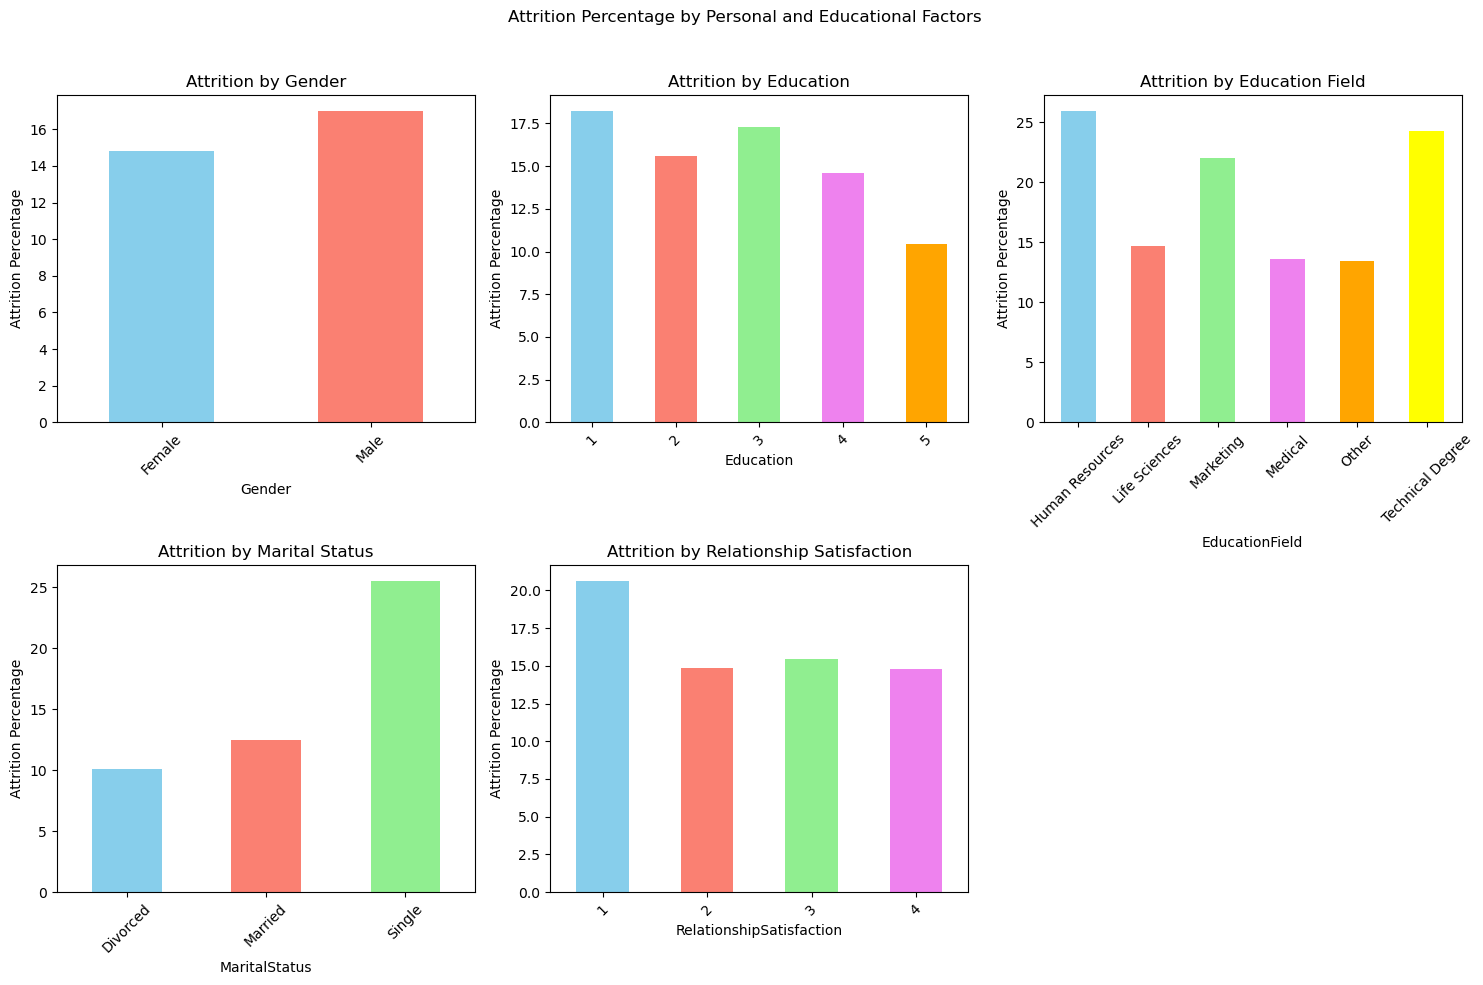

In [10]:
# Choose color for plots
colors = ['skyblue', 'salmon', 'lightgreen', 'violet', 'orange', 'yellow']

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Attrition Percentage by Personal and Educational Factors')

# EducationField
education_field_columns = ['EducationField_Human Resources', 'EducationField_Life Sciences',
                           'EducationField_Marketing', 'EducationField_Medical',
                           'EducationField_Other', 'EducationField_Technical Degree']

att_df['EducationField'] = att_df[education_field_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# MaritalStatus
marital_status_columns = ['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']

att_df['MaritalStatus'] = att_df[marital_status_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# Plot attrition percentage by Gender
attrition_by_gender = att_df.groupby('Gender')['Attrition_encoded'].mean() * 100
attrition_by_gender.plot(kind='bar', ax=axes[0, 0], color=colors[:len(attrition_by_gender)], title='Attrition by Gender')
axes[0, 0].set_ylabel('Attrition Percentage')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by Education
attrition_by_education = att_df.groupby('Education')['Attrition_encoded'].mean() * 100
attrition_by_education.plot(kind='bar', ax=axes[0, 1], color=colors[:len(attrition_by_education)], title='Attrition by Education')
axes[0, 1].set_ylabel('Attrition Percentage')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by EducationField
attrition_by_education_field = att_df.groupby('EducationField')['Attrition_encoded'].mean() * 100
attrition_by_education_field.plot(kind='bar', ax=axes[0, 2], color=colors[:len(attrition_by_education_field)], title='Attrition by Education Field')
axes[0, 2].set_ylabel('Attrition Percentage')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot attrition percentage by MaritalStatus
attrition_by_marital_status = att_df.groupby('MaritalStatus')['Attrition_encoded'].mean() * 100
attrition_by_marital_status.plot(kind='bar', ax=axes[1, 0], color=colors[:len(attrition_by_marital_status)], title='Attrition by Marital Status')
axes[1, 0].set_ylabel('Attrition Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by Relationship Satisfaction
attrition_by_relationship_satisfaction = att_df.groupby('RelationshipSatisfaction')['Attrition_encoded'].mean() * 100
attrition_by_relationship_satisfaction.plot(kind='bar', ax=axes[1, 1], color=colors[:len(attrition_by_relationship_satisfaction)], title='Attrition by Relationship Satisfaction')
axes[1, 1].set_ylabel('Attrition Percentage')
axes[1, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot
axes[1, 2].axis('off')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

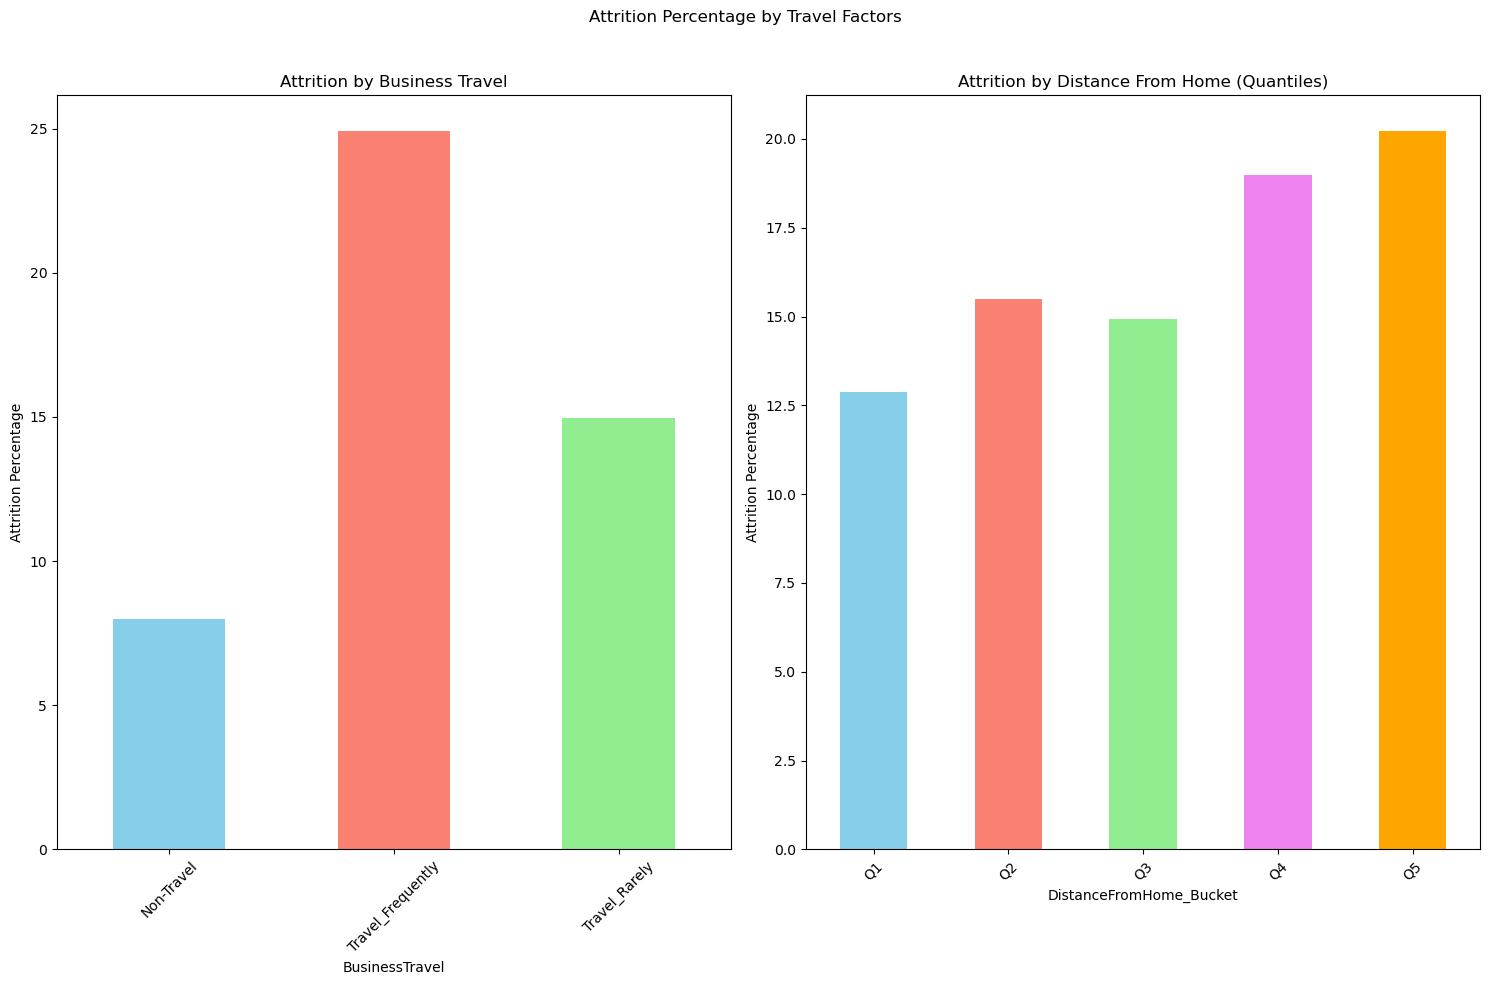

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Attrition Percentage by Travel Factors')

# Plot attrition percentage by Business Travel
attrition_by_business_travel = att_df.groupby('BusinessTravel')['Attrition_encoded'].mean() * 100
attrition_by_business_travel.plot(kind='bar', ax=axes[0], color=colors[:len(attrition_by_business_travel)])
axes[0].set_title('Attrition by Business Travel')
axes[0].set_ylabel('Attrition Percentage')
axes[0].tick_params(axis='x', rotation=45)

# Define ordered mapping for quantiles
quantile_mapping = {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3, 'Q5': 4}

# Bin distance from home into quantiles
att_df['DistanceFromHome_Bucket'] = pd.qcut(att_df['DistanceFromHome'], q=5, labels=[f'Q{i+1}' for i in range(5)])

# Plot attrition percentage by distance from home
attrition_by_distance_from_home = att_df.groupby('DistanceFromHome_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_distance_from_home.plot(kind='bar', ax=axes[1], color=colors[:len(attrition_by_distance_from_home)])
axes[1].set_title('Attrition by Distance From Home (Quantiles)')
axes[1].set_ylabel('Attrition Percentage')
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

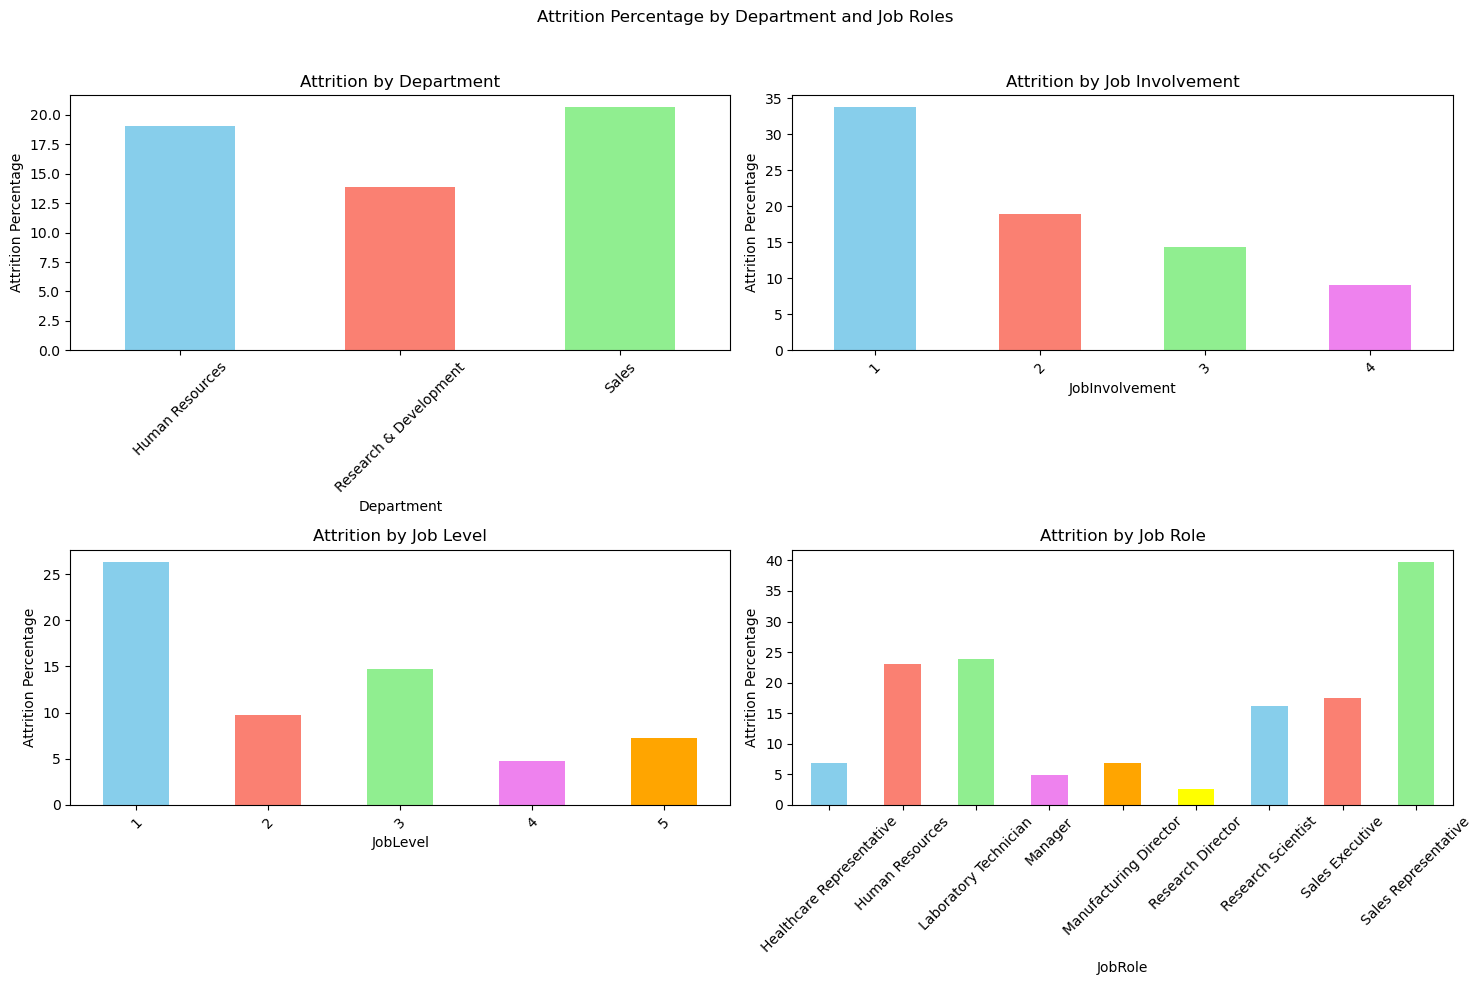

In [32]:
# Mapping dummy variables back to their original categorical columns for Department and JobRole
# Looking back, I should've not prepped the data for modelling before the analysis, oops
# Department
department_columns = ['Department_Human Resources', 'Department_Research & Development', 'Department_Sales']
att_df['Department'] = att_df[department_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# JobRole
job_role_columns = ['JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 
                    'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 
                    'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']
att_df['JobRole'] = att_df[job_role_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Attrition Percentage by Department and Job Roles')

# Plot attrition percentage by Department
attrition_by_department = att_df.groupby('Department')['Attrition_encoded'].mean() * 100
attrition_by_department.plot(kind='bar', ax=axes[0, 0], color=colors[:len(attrition_by_department)], title='Attrition by Department')
axes[0, 0].set_ylabel('Attrition Percentage')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by JobInvolvement
attrition_by_jobinvolvement = att_df.groupby('JobInvolvement')['Attrition_encoded'].mean() * 100
attrition_by_jobinvolvement.plot(kind='bar', ax=axes[0, 1], color=colors[:len(attrition_by_jobinvolvement)], title='Attrition by Job Involvement')
axes[0, 1].set_ylabel('Attrition Percentage')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by JobLevel
attrition_by_joblevel = att_df.groupby('JobLevel')['Attrition_encoded'].mean() * 100
attrition_by_joblevel.plot(kind='bar', ax=axes[1, 0], color=colors[:len(attrition_by_joblevel)], title='Attrition by Job Level')
axes[1, 0].set_ylabel('Attrition Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by JobRole
attrition_by_jobrole = att_df.groupby('JobRole')['Attrition_encoded'].mean() * 100
attrition_by_jobrole.plot(kind='bar', ax=axes[1, 1], color=colors[:len(attrition_by_jobrole)], title='Attrition by Job Role')
axes[1, 1].set_ylabel('Attrition Percentage')
axes[1, 1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

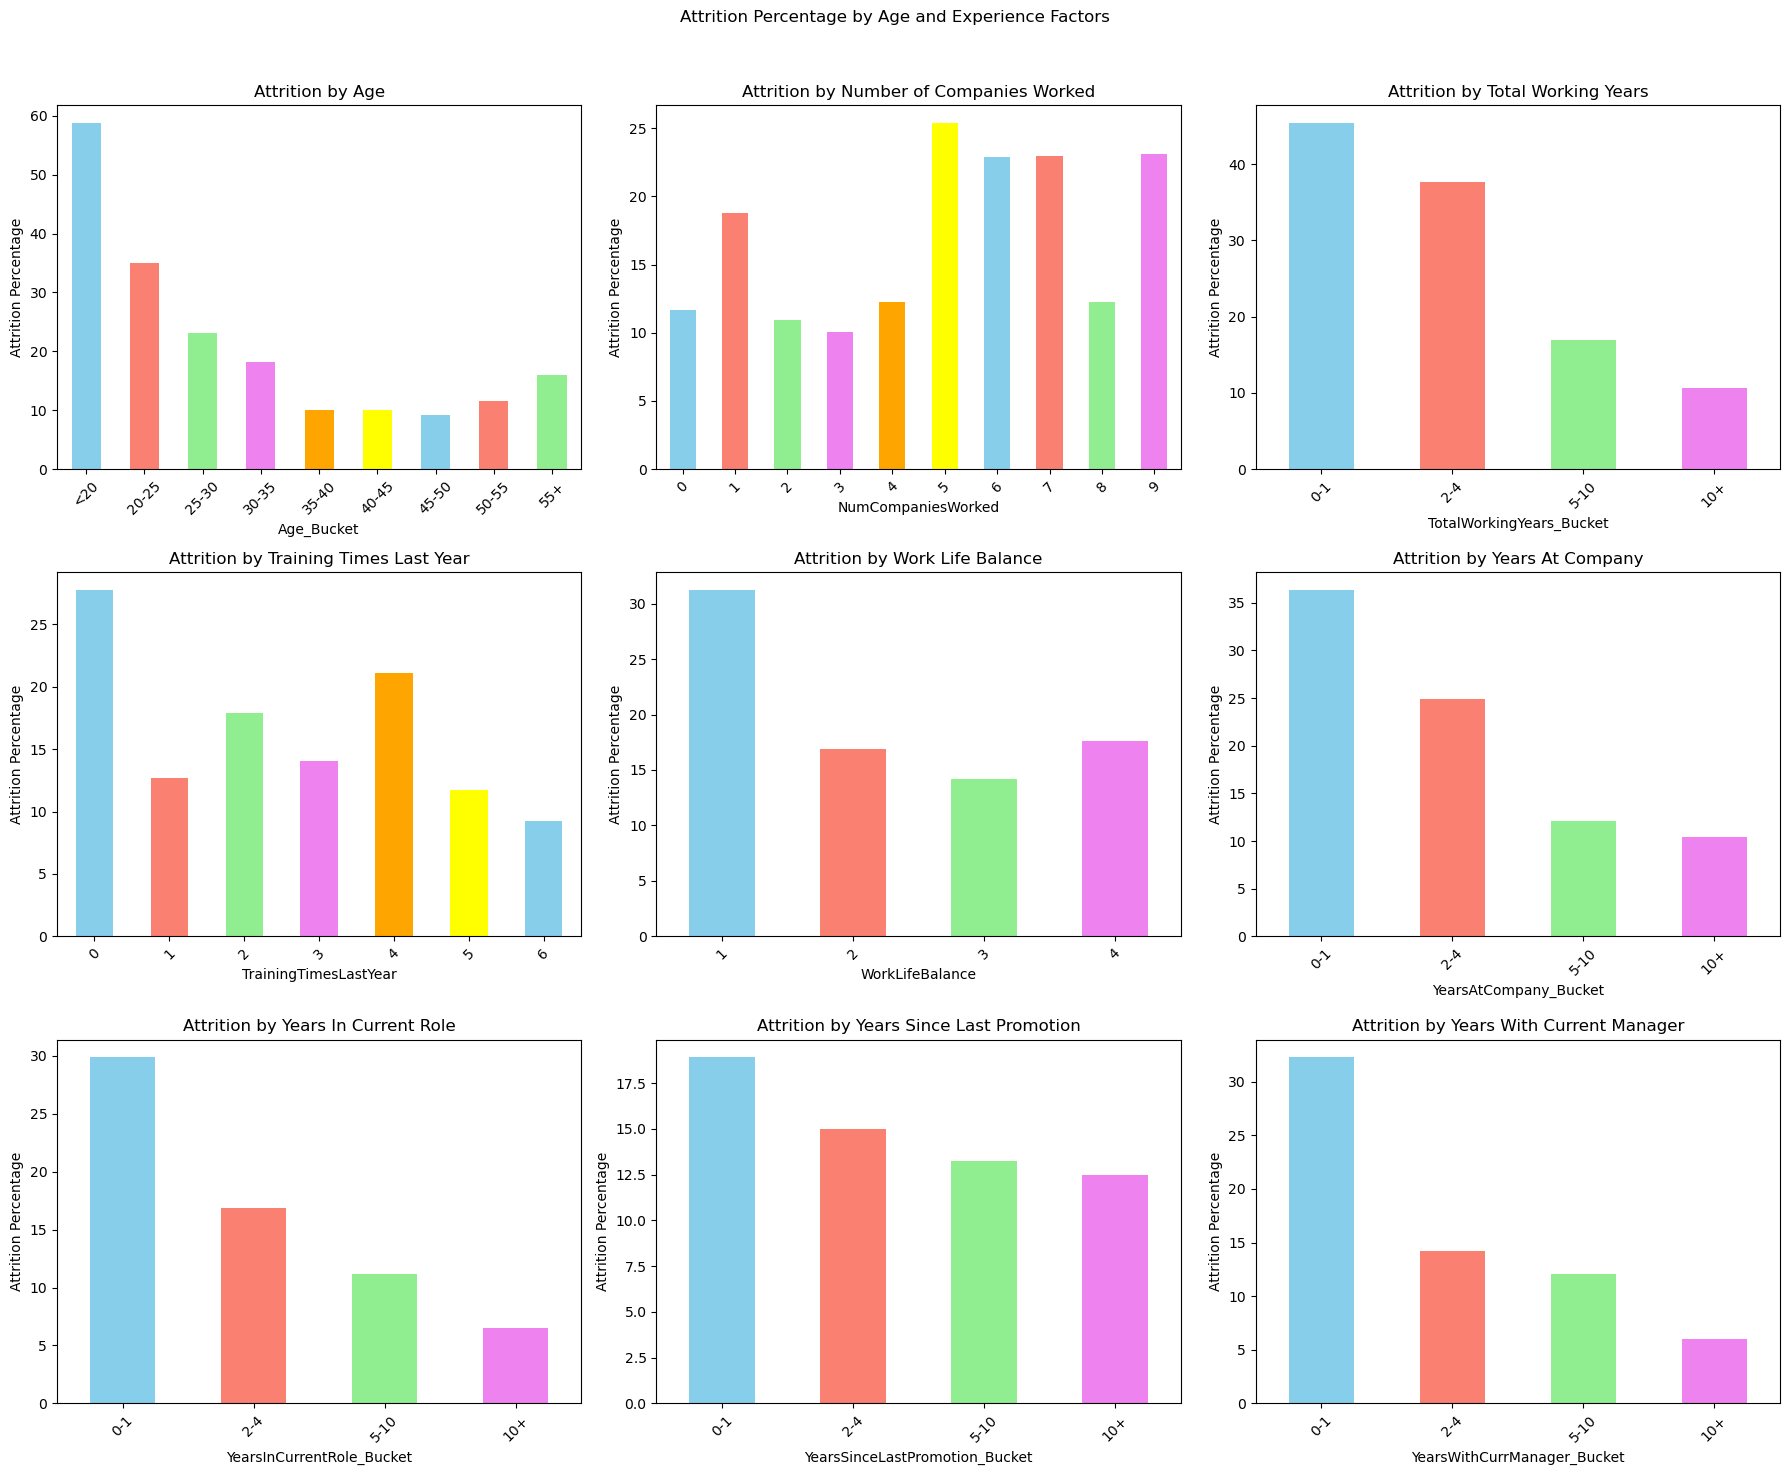

In [27]:
# Bin Age into 5-year intervals
age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 100]
age_labels = ['<20' ,'20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55+']
att_df['Age_Bucket'] = pd.cut(att_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Bin TotalWorkingYears into the specified ranges
total_working_years_bins = [0, 1, 4, 10, 100]
total_working_years = ['0-1', '2-4', '5-10', '10+']
att_df['TotalWorkingYears_Bucket'] = pd.cut(att_df['TotalWorkingYears'], bins=total_working_years_bins, labels=total_working_years, right=False)

# Bin YearsAtCompany into the specified ranges
years_at_company_bins = [0, 1, 4, 10, 100]
years_at_company_labels = ['0-1', '2-4', '5-10', '10+']
att_df['YearsAtCompany_Bucket'] = pd.cut(att_df['YearsAtCompany'], bins=years_at_company_bins, labels=years_at_company_labels, right=False)

# Bin YearsInCurrentRole into the specified ranges
YearsInCurrentRole_bins = [0, 1, 4, 10, 100]
YearsInCurrentRole_labels = ['0-1', '2-4', '5-10', '10+']
att_df['YearsInCurrentRole_Bucket'] = pd.cut(att_df['YearsInCurrentRole'], bins=years_at_company_bins, labels=years_at_company_labels, right=False)


# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Attrition Percentage by Age and Experience Factors')

# Plot attrition percentage by Age Bucket
attrition_by_age = att_df.groupby('Age_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_age.plot(kind='bar', ax=axes[0, 0], color=colors[:len(attrition_by_age)], title='Attrition by Age')
axes[0, 0].set_ylabel('Attrition Percentage')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by NumCompaniesWorked
attrition_by_num_companies = att_df.groupby('NumCompaniesWorked')['Attrition_encoded'].mean() * 100
attrition_by_num_companies.plot(kind='bar', ax=axes[0, 1], color=colors[:len(attrition_by_num_companies)], title='Attrition by Number of Companies Worked')
axes[0, 1].set_ylabel('Attrition Percentage')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by TotalWorkingYears
attrition_by_total_working_years = att_df.groupby('TotalWorkingYears_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_total_working_years.plot(kind='bar', ax=axes[0, 2], color=colors[:len(attrition_by_total_working_years)], title='Attrition by Total Working Years')
axes[0, 2].set_ylabel('Attrition Percentage')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot attrition percentage by TrainingTimesLastYear
attrition_by_training_times = att_df.groupby('TrainingTimesLastYear')['Attrition_encoded'].mean() * 100
attrition_by_training_times.plot(kind='bar', ax=axes[1, 0], color=colors[:len(attrition_by_training_times)], title='Attrition by Training Times Last Year')
axes[1, 0].set_ylabel('Attrition Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by WorkLifeBalance
attrition_by_work_life_balance = att_df.groupby('WorkLifeBalance')['Attrition_encoded'].mean() * 100
attrition_by_work_life_balance.plot(kind='bar', ax=axes[1, 1], color=colors[:len(attrition_by_work_life_balance)], title='Attrition by Work Life Balance')
axes[1, 1].set_ylabel('Attrition Percentage')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by YearsAtCompany Bucket
attrition_by_years_at_company = att_df.groupby('YearsAtCompany_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_years_at_company.plot(kind='bar', ax=axes[1, 2], color=colors[:len(attrition_by_years_at_company)], title='Attrition by Years At Company')
axes[1, 2].set_ylabel('Attrition Percentage')
axes[1, 2].tick_params(axis='x', rotation=45)

# Bin the yearsIn-related columns into 5 quantiles
yearsIn_columns = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
YearsIn_bins = [0, 1, 4, 10, 100]
YearsIn_labels = ['0-1', '2-4', '5-10', '10+']

for column in yearsIn_columns:
    att_df[f'{column}_Bucket'] = pd.cut(att_df[column], bins=YearsIn_bins, labels=YearsIn_labels, right=False)

# Plot attrition percentage by YearsInCurrentRole
attrition_by_years_in_current_role = att_df.groupby('YearsInCurrentRole_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_years_in_current_role.plot(kind='bar', ax=axes[2, 0], color=colors[:len(attrition_by_years_in_current_role)], title='Attrition by Years In Current Role')
axes[2, 0].set_ylabel('Attrition Percentage')
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by YearsSinceLastPromotion
attrition_by_years_since_last_promotion = att_df.groupby('YearsSinceLastPromotion_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_years_since_last_promotion.plot(kind='bar', ax=axes[2, 1], color=colors[:len(attrition_by_years_since_last_promotion)], title='Attrition by Years Since Last Promotion')
axes[2, 1].set_ylabel('Attrition Percentage')
axes[2, 1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by YearsWithCurrManager
attrition_by_years_with_curr_manager = att_df.groupby('YearsWithCurrManager_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_years_with_curr_manager.plot(kind='bar', ax=axes[2, 2], color=colors[:len(attrition_by_years_with_curr_manager)], title='Attrition by Years With Current Manager')
axes[2, 2].set_ylabel('Attrition Percentage')
axes[2, 2].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

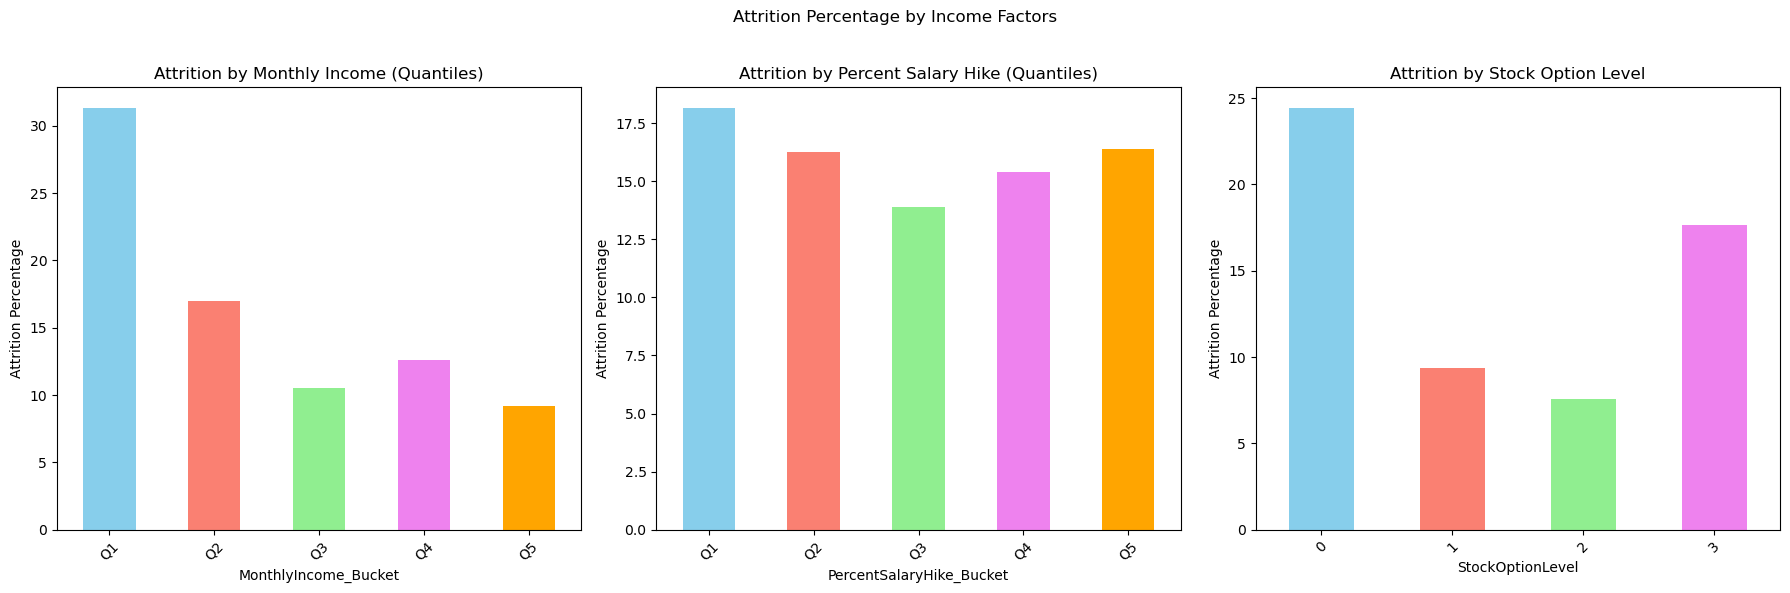

In [36]:
# Bin the income-related columns into 5 quantiles
income_columns = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']
for column in income_columns:
    att_df[f'{column}_Bucket'] = pd.qcut(att_df[column], q=5, labels=[f'Q{i+1}' for i in range(5)])
# Went for only monthly income, instead of rates in terms of analysis, as I was unsure about the context for rates

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Attrition Percentage by Income Factors')

# Plot attrition percentage by MonthlyIncome Bucket
attrition_by_monthly_income = att_df.groupby('MonthlyIncome_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_monthly_income.plot(kind='bar', ax=axes[0], color=colors[:len(attrition_by_monthly_income)], title='Attrition by Monthly Income (Quantiles)')
axes[0].set_ylabel('Attrition Percentage')
axes[0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by PercentSalaryHike Bucket
attrition_by_percent_salary_hike = att_df.groupby('PercentSalaryHike_Bucket')['Attrition_encoded'].mean() * 100
attrition_by_percent_salary_hike.plot(kind='bar', ax=axes[1], color=colors[:len(attrition_by_percent_salary_hike)], title='Attrition by Percent Salary Hike (Quantiles)')
axes[1].set_ylabel('Attrition Percentage')
axes[1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by StockOptionLevel
attrition_by_stock_option_level = att_df.groupby('StockOptionLevel')['Attrition_encoded'].mean() * 100
attrition_by_stock_option_level.plot(kind='bar', ax=axes[2], color=colors[:len(attrition_by_stock_option_level)], title='Attrition by Stock Option Level')
axes[2].set_ylabel('Attrition Percentage')
axes[2].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

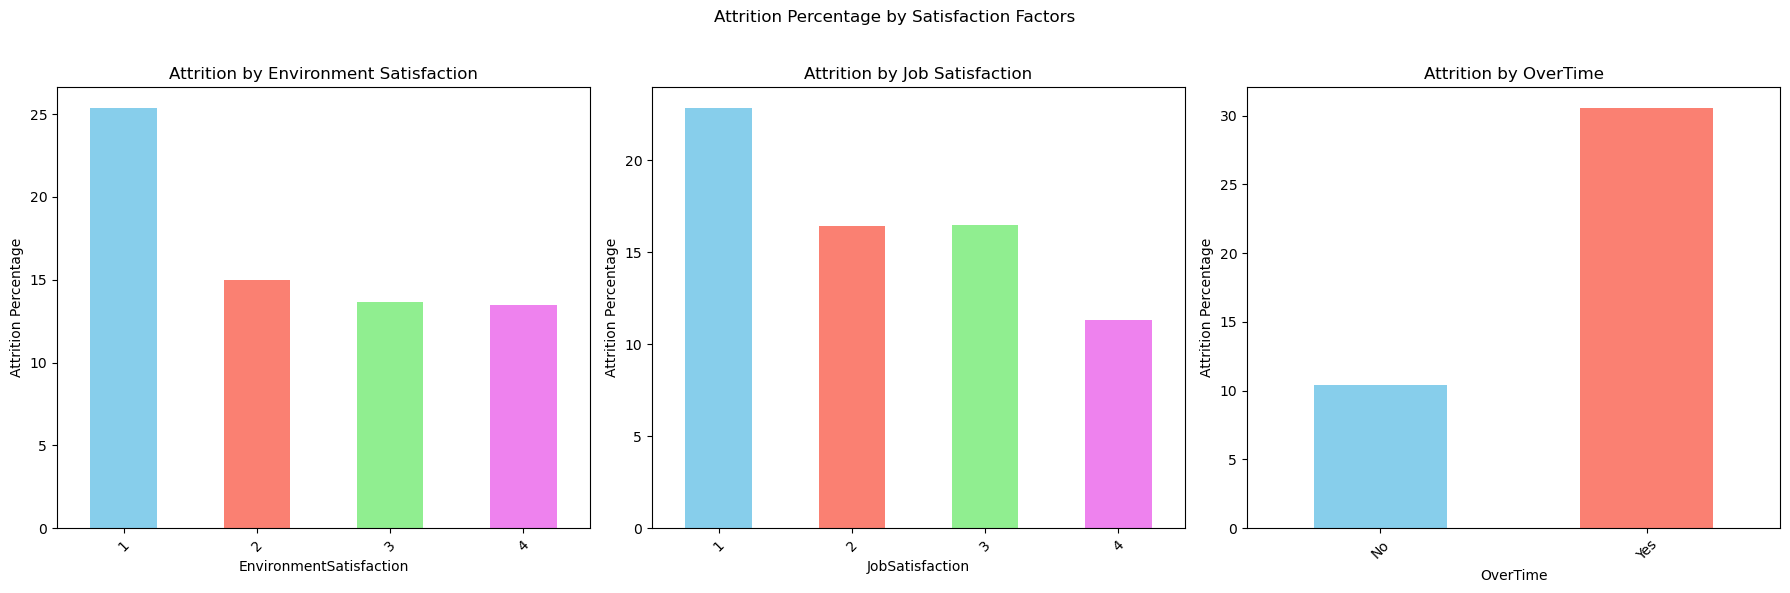

In [35]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Attrition Percentage by Satisfaction Factors')

# Plot attrition percentage by Environment Satisfaction
attrition_by_environment_satisfaction = att_df.groupby('EnvironmentSatisfaction')['Attrition_encoded'].mean() * 100
attrition_by_environment_satisfaction.plot(kind='bar', ax=axes[0], color=colors[:len(attrition_by_environment_satisfaction)], title='Attrition by Environment Satisfaction')
axes[0].set_ylabel('Attrition Percentage')
axes[0].tick_params(axis='x', rotation=45)

# Plot attrition percentage by Job Satisfaction
attrition_by_job_satisfaction = att_df.groupby('JobSatisfaction')['Attrition_encoded'].mean() * 100
attrition_by_job_satisfaction.plot(kind='bar', ax=axes[1], color=colors[:len(attrition_by_job_satisfaction)], title='Attrition by Job Satisfaction')
axes[1].set_ylabel('Attrition Percentage')
axes[1].tick_params(axis='x', rotation=45)

# Plot attrition percentage by OverTime
attrition_by_overtime = att_df.groupby('OverTime')['Attrition_encoded'].mean() * 100
attrition_by_overtime.plot(kind='bar', ax=axes[2], color=colors[:len(attrition_by_overtime)], title='Attrition by OverTime')
axes[2].set_ylabel('Attrition Percentage')
axes[2].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [36]:
# Final overview of data before modelling
att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   object  
 2   BusinessTravel                     1470 non-null   object  
 3   DailyRate                          1470 non-null   int64   
 4   DistanceFromHome                   1470 non-null   int64   
 5   Education                          1470 non-null   int64   
 6   EmployeeNumber                     1470 non-null   int64   
 7   EnvironmentSatisfaction            1470 non-null   int64   
 8   Gender                             1470 non-null   object  
 9   HourlyRate                         1470 non-null   int64   
 10  JobInvolvement                     1470 non-null   int64   
 11  JobLevel                           1470 non

In [40]:
# Export data
export_filepath = 'filepath/Model_Data_HR-Employee-Attrition.csv'
att_df.to_csv(export_filepath, index=False)